#### Logistic Regression for Classifier

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df = pd.get_dummies(df, drop_first=True)

X = df.drop('Purchased', axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90        79
           1       0.86      0.73      0.79        41

    accuracy                           0.87       120
   macro avg       0.86      0.83      0.85       120
weighted avg       0.87      0.87      0.86       120



/Users/solomonrajkumar.sathianandaraj/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/solomonrajkumar.sathianandaraj/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/solomonrajkumar.sathianandaraj/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/solomonrajkumar.sathianandaraj/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/solomonrajkumar.sathianandaraj/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: Converg

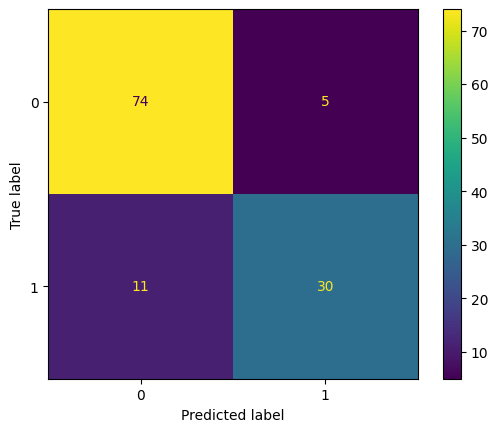

In [3]:
praram_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, praram_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()  